# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_data = btc_url + "?format=json"
btc_data = requests.get (btc_url).json()
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18522593,
            "total_supply": 18522593,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11930.66,
                    "volume_24h": 21367303922,
                    "market_cap": 221036253644,
                    "percentage_change_1h": 0.301227302885033,
                    "percentage_change_24h": 1.36914824023524,
                    "percentage_change_7d": 3.35677907289373,
                    "percent_change_1h": 0.301227302885033,
                    "percent_change_24h": 1.36914824023524,
                    "percent_change_7d": 3.35677907289373
                },
                "CAD": {
                    "price": 15661.377382,
                    "volume_24h": 28048859858.4094,
                    

In [5]:
eth_url = eth_url + "?format=json"
eth_data = requests.get (eth_url).json()


print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113089482,
            "total_supply": 113089482,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 368.63,
                    "volume_24h": 7774213238,
                    "market_cap": 41685193983,
                    "percentage_change_1h": 0.21136695667399,
                    "percentage_change_24h": -2.86908445027037,
                    "percentage_change_7d": -4.8098710458905,
                    "percent_change_1h": 0.21136695667399,
                    "percent_change_24h": -2.86908445027037,
                    "percent_change_7d": -4.8098710458905
                }
            },
            "last_updated": 1603233870
        }
    },
    "metadata": {
        "timestamp": 1603233870,
        "num_cryptoc

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
BTC_current_PRICE = btc_data["data"]["1"]["quotes"]["USD"]["price"]
BTC_current_PRICE

11930.66

In [7]:
# Fetch current ETH price
# YOUR CODE HERE!]
eth_current_PRICE = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
eth_current_PRICE

368.63

In [55]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * BTC_current_PRICE
my_eth_value = my_eth * eth_current_PRICE
crypto_assets_value = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your crypto_assets ETH is ${crypto_assets_value:0.2f}")

The current value of your 1.2 BTC is $14139.24
The current value of your 5.3 ETH is $2031.17
The current value of your crypto_assets ETH is $16170.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [56]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 50 
my_agg =200

In [57]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [58]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-15", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
 # Get current price data for MSFT and AAPL
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-10-15 00:00:00-04:00  118.15  118.15  117.96  117.97  4977703  343.71   

                                                             
                             high     low   close    volume  
2020-10-15 00:00:00-04:00  348.02  343.13  347.51  50609035

In [59]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.97
Current SPY closing price: $347.51


In [91]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy 
my_agg_value = agg_close_price * my_agg
my_shares = my_spy_value + my_agg_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your total shares is ${my_shares:0.2f}")

The current value of your 50 SPY shares is $17375.50
The current value of your 200 AGG shares is $23594.00
The current value of your total shares is $40969.50


### Savings Health Analysis

In [61]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
assets = ['CRYPTO', 'SHARES']
value_data = {'AMOUNT':(crypto_assets_value, my_shares)}
df_savings = pd.DataFrame(value_data, index=assets)
# Display savings DataFrame
display(df_savings)

,AMOUNT
CRYPTO,16170.412
SHARES,40969.500


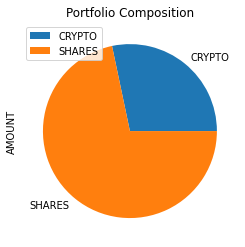

In [62]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y='AMOUNT', title = "Portfolio Composition")

In [63]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
my_savings = crypto_assets_value + my_shares
savings_short = my_savings -emergency_fund
# Validate saving health
# YOUR CODE HERE!
if my_savings > emergency_fund:
    print(F"(Congrats! you have enough funds")
elif my_savings == emergency_fund:
    print(F"(Congrats! you have reach this financial goal")
elif savings_short < 0:
    print(F"( you are short ${savings_shor} funds")
print (f"Your emergency funds are ${emergency_fund}:.2f")
print (f" Your savings are ${my_savings}:.2f")

(Congrats! you have enough funds
Your emergency funds are $36000:.2f
 Your savings are $57139.912:.2f


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [64]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [118]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

df_stock_data.head()

# Display sample data
#df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

###### Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

traditional_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 500,
    num_trading_days = 252 * 30)

In [67]:
# Printing the simulation input data
# YOUR CODE HERE!
traditional_portfolio.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [68]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
traditional_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993109,1.003158,1.002565,1.002053,0.993354,0.998106,0.993893,1.003028,0.989505,0.984745,...,1.012640,0.997355,1.005172,1.017101,1.002616,0.993952,0.998912,0.989882,0.985924,1.007595
2,0.995721,0.996726,0.998017,0.997065,0.995849,0.998926,0.997836,1.004274,0.977310,0.976881,...,1.015573,1.009053,0.997796,1.011090,0.996821,0.993209,1.006305,0.986764,0.973021,1.009612
3,0.999621,1.015354,1.004044,1.003871,1.004543,0.988155,1.000808,0.995411,0.968536,0.973920,...,1.020846,1.003571,0.991122,1.006495,1.013011,0.986519,0.998082,0.984081,0.974553,1.006069
4,0.988985,1.018317,1.003349,1.004900,1.000111,0.985479,0.992796,0.986212,0.968247,0.973075,...,1.020443,1.001404,0.995593,0.998065,1.019503,0.997380,0.998458,0.986718,0.983288,0.993926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.654665,5.623246,6.812674,14.016706,7.066623,32.566594,5.258294,23.454649,8.594263,8.547055,...,15.818116,3.575792,22.446461,2.971912,5.910791,14.927850,3.306955,9.446525,1.745567,10.540797
7557,8.737553,5.575684,6.723422,14.054636,7.003938,32.302990,5.299633,23.398898,8.615879,8.428751,...,15.715656,3.558364,22.623152,2.953524,5.901000,14.734385,3.240934,9.443709,1.753330,10.485146
7558,8.636906,5.574263,6.643798,14.125989,7.054118,32.684878,5.296570,23.456454,8.678988,8.397897,...,15.740001,3.547727,23.008718,2.980437,5.868903,14.540071,3.249027,9.464800,1.775675,10.456561
7559,8.585449,5.614671,6.707866,14.242794,7.004137,32.751760,5.303843,23.500866,8.692395,8.427593,...,15.535631,3.553826,23.097889,2.968303,5.893861,14.467548,3.246483,9.413882,1.788821,10.432013


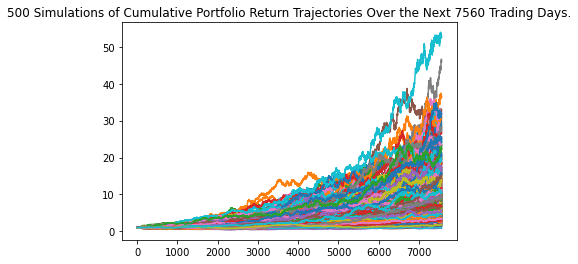

In [69]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = traditional_portfolio.plot_simulation()

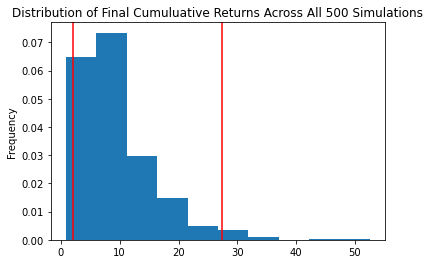

In [70]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = traditional_portfolio.plot_distribution()

### Retirement Analysis

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
traditional_tbl = traditional_portfolio.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(traditional_tbl)

count           500.000000
mean              9.563997
std               6.596567
min               0.832514
25%               5.072072
50%               7.759089
75%              12.187568
max              52.584217
95% CI Lower      1.980008
95% CI Upper     27.404343
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [72]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(traditional_tbl[8]*initial_investment,2)
ci_upper = round(traditional_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39600.16 and $548086.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [73]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(traditional_tbl[8]*initial_investment,2)
ci_upper = round(traditional_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $59400.24 and $822130.3


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [75]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!traditional_portfolio = MCSimulation(
five_yr_ret = MCSimulation(
portfolio_data = df_stock_data,
weights = [.60, .40],
num_simulation = 500,
num_trading_days = 252 * 5)

In [76]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
five_yr_ret.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996870,1.001590,1.002404,0.996975,0.994581,1.000170,0.998527,0.999408,1.005696,1.001806,...,1.000152,1.004264,0.999114,0.999745,1.003170,1.008745,1.004140,0.999815,1.002871,1.004846
2,0.993944,1.003985,1.006199,0.990234,1.000775,0.994894,1.001335,1.004298,1.008820,0.999475,...,0.987983,1.001778,1.010664,0.997961,1.008185,1.015443,1.000251,1.000774,1.009843,1.007693
3,0.996379,0.994576,1.003821,0.996522,1.000511,0.999653,1.003122,1.004984,1.008260,1.000089,...,0.992910,1.000677,1.015242,0.998950,0.996993,1.013351,0.999497,1.001296,1.004768,1.005755
4,1.002452,0.992201,1.014294,0.984232,0.994465,0.992114,0.998745,1.010492,1.008193,0.997227,...,0.984521,0.996065,1.021687,0.990893,0.992719,1.018575,1.001810,0.997451,1.005016,1.004994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.006462,1.373320,1.013080,1.089372,2.005220,1.154246,1.438122,0.828169,1.179815,1.170489,...,1.705185,1.481389,1.096113,1.317754,0.974163,1.349017,1.265105,1.054710,1.075246,1.258100
1257,1.006904,1.369922,1.019807,1.087051,2.001048,1.157775,1.436443,0.829272,1.183472,1.164559,...,1.694845,1.483915,1.087139,1.314209,0.971748,1.337249,1.259344,1.064925,1.078514,1.247795
1258,1.007010,1.368971,1.015282,1.089237,1.989668,1.162760,1.438294,0.833477,1.191467,1.172780,...,1.706894,1.486295,1.079464,1.304633,0.977243,1.330413,1.265722,1.063194,1.071846,1.245467
1259,1.012234,1.359854,1.017080,1.083745,1.991478,1.164979,1.457238,0.830186,1.187163,1.177468,...,1.712253,1.481164,1.080166,1.292940,0.976821,1.349322,1.258584,1.055407,1.084228,1.245807


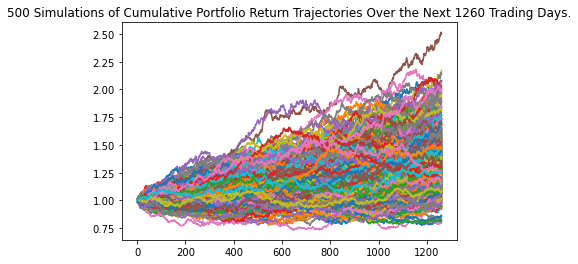

In [77]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = five_yr_ret.plot_simulation()

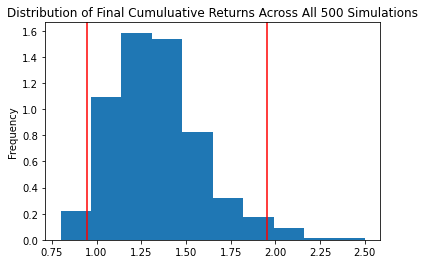

In [78]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot =five_yr_ret.plot_distribution()

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
five_yr_ret_tbl = traditional_portfolio.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(five_yr_ret_tbl)

count           500.000000
mean              9.563997
std               6.596567
min               0.832514
25%               5.072072
50%               7.759089
75%              12.187568
max              52.584217
95% CI Lower      1.980008
95% CI Upper     27.404343
Name: 7560, dtype: float64


In [82]:
# Set initial investment
# YOUR CODE HERE!
initial_invesment = 50000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(five_yr_ret_tbl[8]*initial_investment,2)
ci_upper_five = round(five_yr_ret_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $59400.24 and $822130.3


### Ten Years Retirement Option

In [83]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
ten_yr_ret = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 10)

In [84]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
ten_yr_ret.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994256,0.995716,0.992349,1.003626,0.991871,0.997419,0.990150,0.998962,0.994439,0.996526,...,0.993826,1.003317,0.998280,0.999098,1.000073,0.994234,1.000365,0.997197,0.998850,1.000803
2,0.999418,0.993952,0.987300,1.007848,0.990148,0.997535,0.987870,1.009341,0.990378,0.998359,...,0.995178,1.006437,0.997168,1.003133,1.000649,0.993310,1.006979,0.996897,0.999401,1.003937
3,0.992975,0.989328,0.992705,1.014630,0.999798,0.988701,0.996233,1.007603,0.982825,1.004471,...,0.988952,1.011800,1.001209,1.001569,1.005189,1.000694,1.004333,0.999424,0.994490,1.003759
4,0.995481,0.984596,0.988486,1.011879,0.995433,0.988295,0.999117,1.006756,0.975420,1.007887,...,0.992944,1.006040,1.006134,1.005966,1.001990,1.010574,1.016344,0.996533,0.993129,1.002743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.644128,1.826789,1.811059,2.360764,1.929837,2.095329,1.649901,1.785398,1.402427,1.886976,...,1.952024,1.760618,1.761430,1.945620,1.867633,1.763423,1.570321,2.429562,1.563155,1.925908
2517,2.640812,1.830275,1.813142,2.366398,1.936217,2.104475,1.636007,1.782880,1.410277,1.892021,...,1.957326,1.771008,1.774278,1.936330,1.881123,1.759526,1.568095,2.431839,1.568585,1.931377
2518,2.658748,1.838274,1.811842,2.360332,1.920478,2.088670,1.632223,1.791666,1.408461,1.905626,...,1.950893,1.787267,1.764578,1.948184,1.864156,1.763540,1.567592,2.462297,1.563591,1.936028
2519,2.645595,1.841913,1.819652,2.361877,1.900691,2.090471,1.626133,1.787865,1.408962,1.906311,...,1.947887,1.800307,1.768992,1.928958,1.861122,1.781383,1.565082,2.483042,1.568925,1.949701


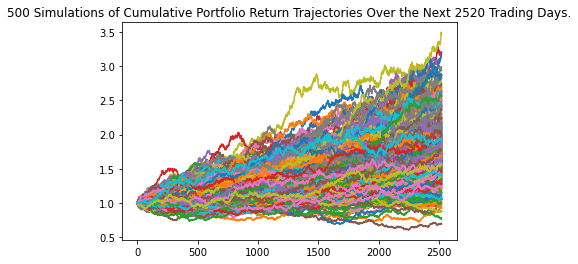

In [85]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = ten_yr_ret.plot_simulation()

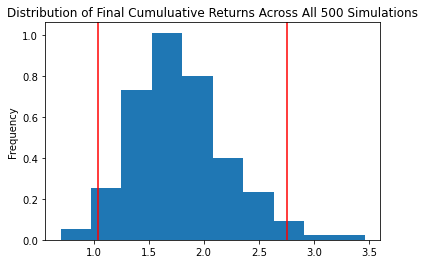

In [86]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot =ten_yr_ret.plot_distribution()

In [87]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ten_yr_ret_tbl = traditional_portfolio.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(ten_yr_ret_tbl)

count           500.000000
mean              9.563997
std               6.596567
min               0.832514
25%               5.072072
50%               7.759089
75%              12.187568
max              52.584217
95% CI Lower      1.980008
95% CI Upper     27.404343
Name: 7560, dtype: float64


In [89]:
# Set initial investment
# YOUR CODE HERE!
initial_invesment = 40000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(ten_yr_ret_tbl[8]*initial_investment,2)
ci_upper_ten = round(ten_yr_ret_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $59400.24 and $822130.3
